In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [12]:
df = pd.read_csv('input/amazon/Reviews.csv')

print(df.shape)
df = df.head(500)
print(df.shape)


(94241, 10)
(500, 10)


In [13]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


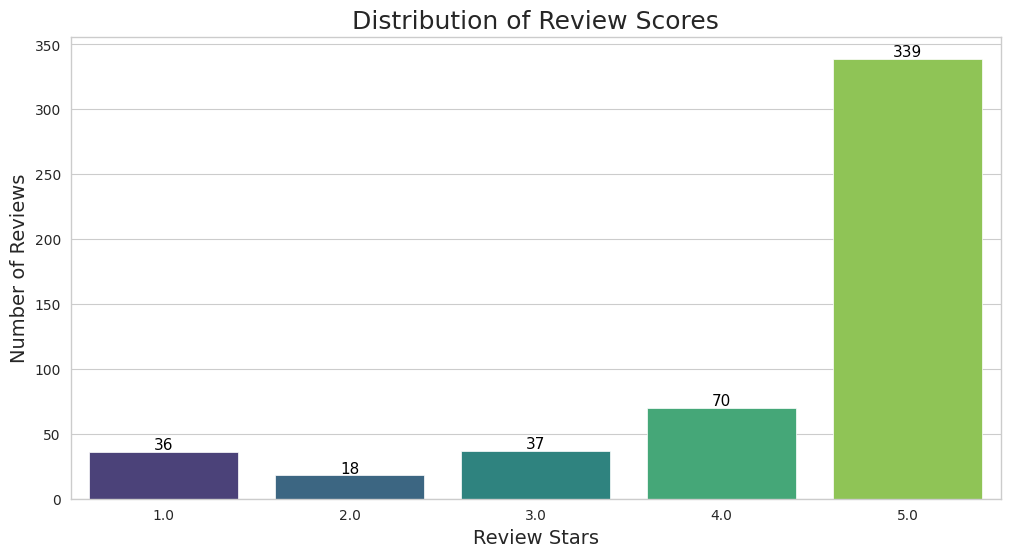

In [14]:
# Set Seaborn style
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Score', order=sorted(df['Score'].unique()), palette="viridis")

# Add title and labels
plt.title('Distribution of Review Scores', fontsize=18)
plt.xlabel('Review Stars', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)

# Add annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=11, color='black',
                xytext=(0,5),
                textcoords='offset points')

# Display the plot
plt.show()

## Basic NLTK

In [15]:
example = df['Text'][10]
print(example)

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!


In [17]:
# Used for tokenizing the cell
!python -m nltk.downloader punkt


/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [20]:
tokens = nltk.word_tokenize(example)
tokens[:20]

['I',
 'do',
 "n't",
 'know',
 'if',
 'it',
 "'s",
 'the',
 'cactus',
 'or',
 'the',
 'tequila',
 'or',
 'just',
 'the',
 'unique',
 'combination',
 'of',
 'ingredients',
 ',']

In [23]:
!python -m nltk.downloader averaged_perceptron_tagger


/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [24]:
tagged = nltk.pos_tag(tokens)
tagged[:20]

[('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('know', 'VB'),
 ('if', 'IN'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('the', 'DT'),
 ('cactus', 'NN'),
 ('or', 'CC'),
 ('the', 'DT'),
 ('tequila', 'NN'),
 ('or', 'CC'),
 ('just', 'RB'),
 ('the', 'DT'),
 ('unique', 'JJ'),
 ('combination', 'NN'),
 ('of', 'IN'),
 ('ingredients', 'NNS'),
 (',', ',')]

In [28]:
!python -m nltk.downloader maxent_ne_chunker
!python -m nltk.downloader words



/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [29]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  do/VBP
  n't/RB
  know/VB
  if/IN
  it/PRP
  's/VBZ
  the/DT
  cactus/NN
  or/CC
  the/DT
  tequila/NN
  or/CC
  just/RB
  the/DT
  unique/JJ
  combination/NN
  of/IN
  ingredients/NNS
  ,/,
  but/CC
  the/DT
  flavour/NN
  of/IN
  this/DT
  hot/JJ
  sauce/NN
  makes/VBZ
  it/PRP
  one/CD
  of/IN
  a/DT
  kind/NN
  !/.
  We/PRP
  picked/VBD
  up/RP
  a/DT
  bottle/NN
  once/RB
  on/IN
  a/DT
  trip/NN
  we/PRP
  were/VBD
  on/IN
  and/CC
  brought/VBD
  it/PRP
  back/RP
  home/NN
  with/IN
  us/PRP
  and/CC
  were/VBD
  totally/RB
  blown/VBN
  away/RB
  !/.
  When/WRB
  we/PRP
  realized/VBD
  that/IN
  we/PRP
  simply/RB
  could/MD
  n't/RB
  find/VB
  it/PRP
  anywhere/RB
  in/IN
  our/PRP$
  city/NN
  we/PRP
  were/VBD
  bummed./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  Now/RB
  ,/,
  because/IN
  of/IN
  the/DT
  magic/NN
  of/IN
  the/DT
  internet/NN
  ,/,
  we/PRP
  have/VBP
  a/DT
  case/NN
  of/IN
  the/DT
  sauce/NN
  and/CC
  are/VBP


In [31]:
!python -m nltk.downloader vader_lexicon



/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [32]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [33]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [34]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [35]:
sia.polarity_scores(example)

{'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}

In [36]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [37]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [39]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


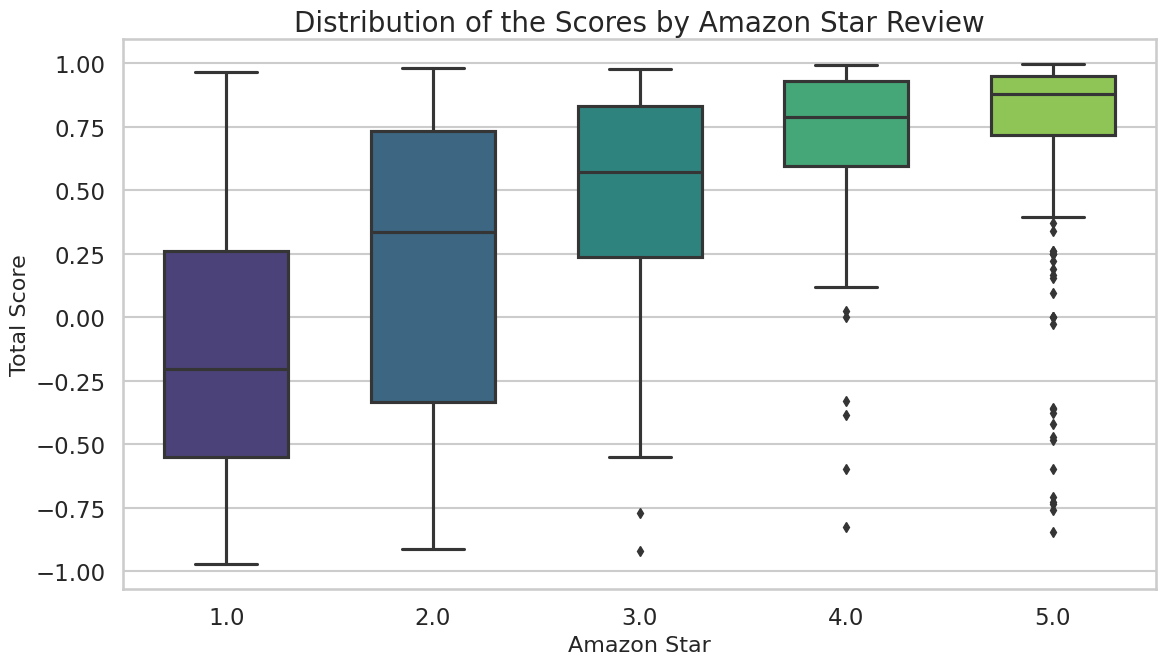

In [43]:
# Set the Seaborn style and context for better aesthetics
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the plot
plt.figure(figsize=(12, 7))
ax = sns.boxplot(data=vaders, x='Score', y='compound', palette="viridis", width=0.6)

# Add title and labels with enhanced font sizes
ax.set_title('Distribution of the Scores by Amazon Star Review', fontsize=20)
ax.set_xlabel('Amazon Star', fontsize=16)
ax.set_ylabel('Total Score', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()


<ipython-input-45-8c410ee14f57>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vaders_grouped = vaders.groupby('Score').mean()[['pos', 'neu', 'neg']]


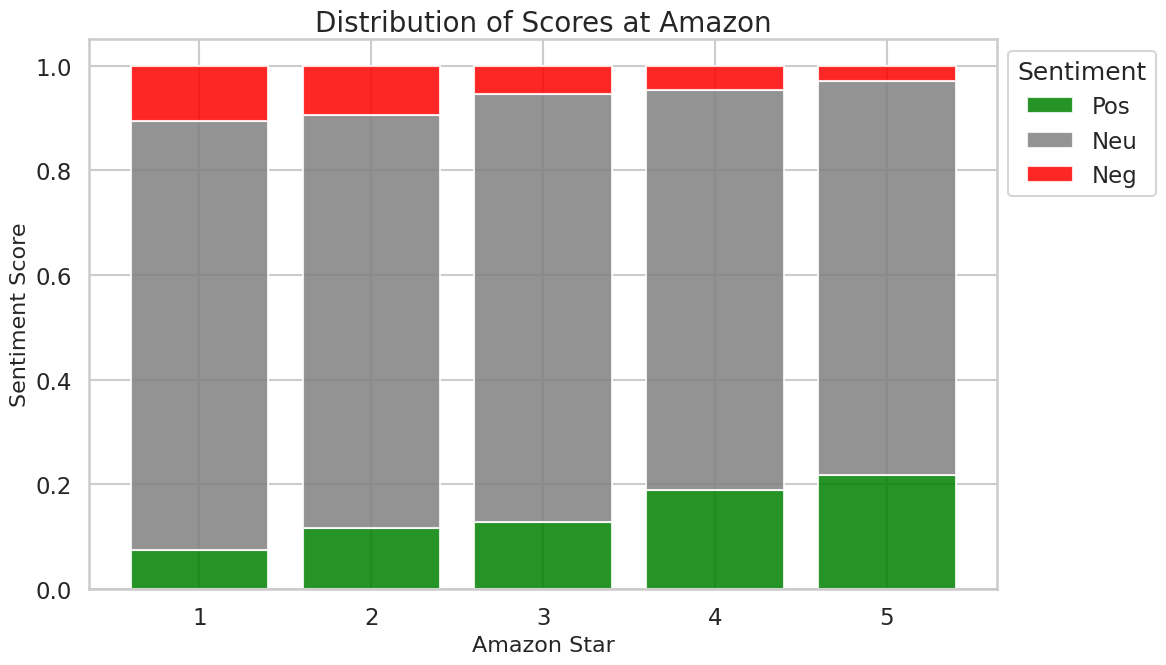

In [45]:
# Set the Seaborn style and context for better aesthetics
sns.set_style("whitegrid")
sns.set_context("talk")

# Prepare data for stacked bar chart
vaders_grouped = vaders.groupby('Score').mean()[['pos', 'neu', 'neg']]

# Create the plot
plt.figure(figsize=(12, 7))

# Plot each category
bottom = np.zeros(len(vaders_grouped))
for column, color in zip(vaders_grouped.columns, ["green", "gray", "red"]):
    plt.bar(vaders_grouped.index, vaders_grouped[column], bottom=bottom, label=column.capitalize(), color=color, alpha=0.85)
    bottom += vaders_grouped[column]

# Add title, labels, and legend
plt.title('Distribution of Scores at Amazon', fontsize=20)
plt.xlabel('Amazon Star', fontsize=16)
plt.ylabel('Sentiment Score', fontsize=16)
plt.legend(title="Sentiment", loc="upper left", bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.show()


In [47]:
!pip install transformers

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.3 MB/s eta 0:00:00


In [48]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [49]:
# VADER results on example
print(example)
sia.polarity_scores(example)

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!


{'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}

In [50]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0191341, 'roberta_neu': 0.07104441, 'roberta_pos': 0.9098215}


In [51]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [52]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [53]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [54]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

<Figure size 1500x1500 with 0 Axes>

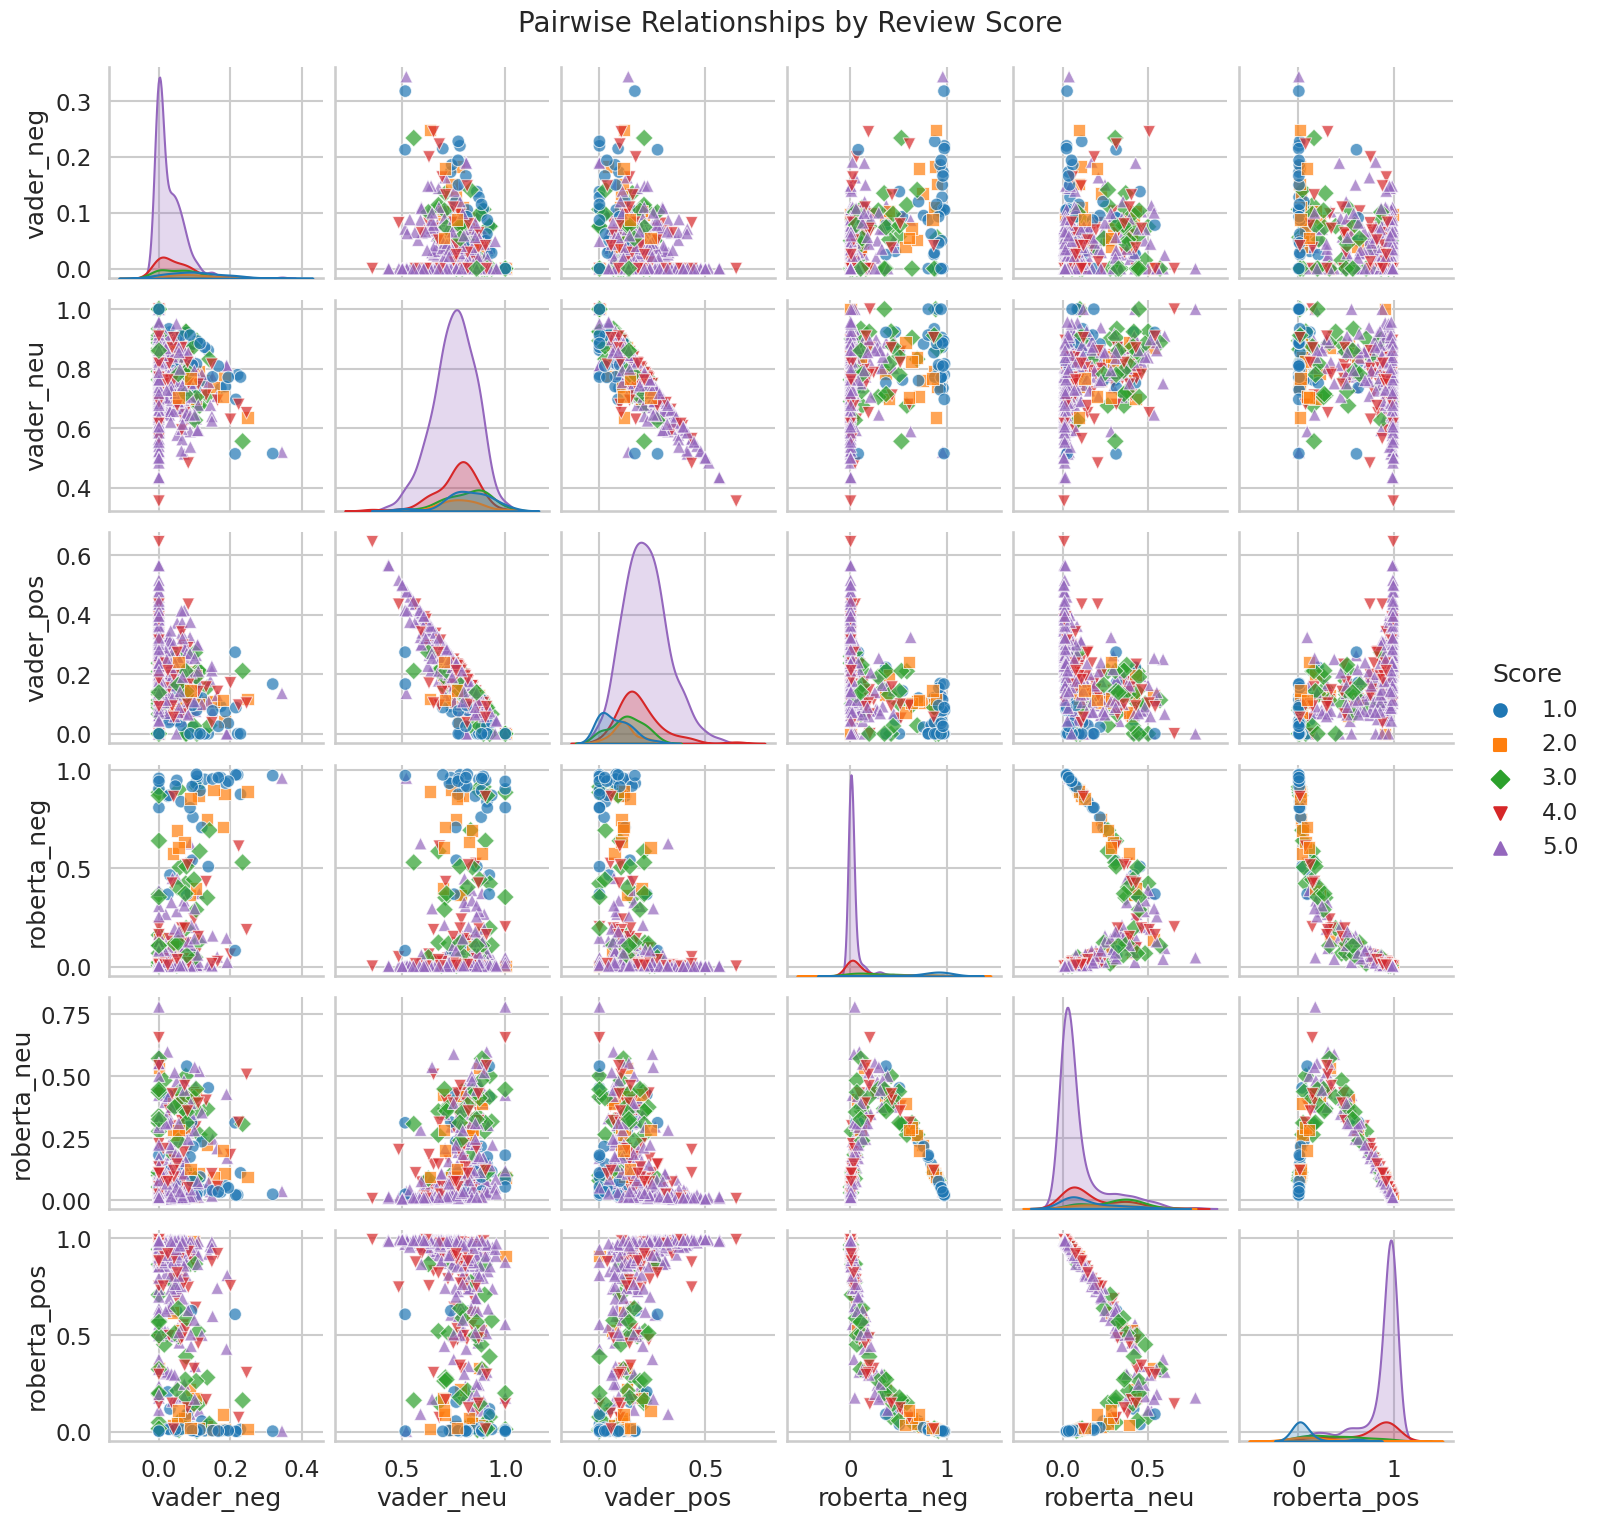

In [57]:
# Set the Seaborn style and context for better aesthetics
sns.set_style("whitegrid")
sns.set_context("talk")

# Determine the number of unique values in the 'Score' column
num_scores = results_df['Score'].nunique()

# Create a list of filled markers based on the number of unique scores
filled_markers = ["o", "s", "D", "v", "^"][:num_scores]

# Create the pairplot
plt.figure(figsize=(15, 15))
g = sns.pairplot(data=results_df,
                 vars=['vader_neg', 'vader_neu', 'vader_pos',
                       'roberta_neg', 'roberta_neu', 'roberta_pos'],
                 hue='Score',
                 palette='tab10',
                 diag_kind='kde',
                 markers=filled_markers,
                 plot_kws={'alpha': 0.7})

# Add title
g.fig.suptitle('Pairwise Relationships by Review Score', y=1.02, fontsize=20)

# Display the plot
plt.show()


In [58]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [59]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [60]:
# nevative sentiment 5-Star view

In [61]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [62]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [63]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [67]:
sent_pipeline('This product is amazing!')

[{'label': 'POSITIVE', 'score': 0.9998860359191895}]

In [68]:
sent_pipeline('This is very bad!')

[{'label': 'NEGATIVE', 'score': 0.9997475743293762}]

In [69]:
sent_pipeline('awesome')

[{'label': 'POSITIVE', 'score': 0.9998682737350464}]